###  Step 1: Importing the required libaries

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Step 2:  Reading the dataset

In [13]:
df = pd.read_csv("Dataset/bottle.csv")
df.head()

C:\Users\KIIT01\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_binary = df[['Salnty', 'T_degC']]
df_binary

,Salnty,T_degC
0,33.4400,10.500
1,33.4400,10.460
2,33.4370,10.460
3,33.4200,10.450
4,33.4210,10.450
...,...,...
864858,33.4083,18.744
864859,33.4083,18.744
864860,33.4150,18.692
864861,33.4062,18.161


In [15]:
# taking only the selected two attributes from the dataset
df_binary.columns = ['Sal', 'Temp']
# display the first 6 rows
df_binary.head(6)

,Sal,Temp
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45
5,33.431,10.45


### Step 3: Exploring the dataset

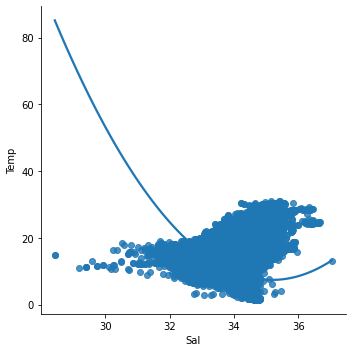

In [16]:
# plotting the scatter plot to check the relationship between the Sal and Temp Variables
sns.lmplot(x="Sal", y="Temp", data = df_binary, order=2, ci= None)

### Step 4: Data cleaning

In [17]:
# Eliminating the NaN or missing input numbers
df_binary.fillna(method="ffill", inplace=True)

C:\Users\KIIT01\anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


### Step 5: Training our model

In [19]:
# Separating the data into dependent and independent varaible 
# converting each dataframe into numpy array
# since each dataframe contains only one column
X = np.array(df_binary['Sal']).reshape(-1,1)
y = np.array(df_binary['Temp']).reshape(-1,1)
# droping any rows with NaN values
df_binary.dropna(inplace=True)

C:\Users\KIIT01\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [22]:
# splitting the data into the  training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [23]:
X_train

array([[33.41 ],
       [34.119],
       [34.396],
       ...,
       [34.054],
       [33.239],
       [34.52 ]])

In [24]:
# Training the model
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [25]:
print(regr.score(X_test,y_test))

0.20710242047319893


### Step 6: Exploring our results

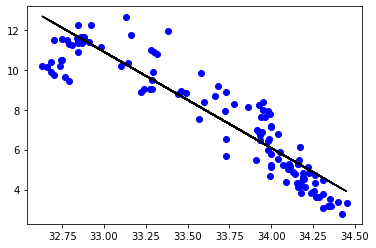

In [39]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color="b")
plt.plot(X_test,y_pred, color="k")
plt.show()

The low accuracy scoeer of our model suggests that our regressive model has not fit very well with the existing data. This suggests that our data is nt suitable for linear regression. But sometimes, a dataset may accept a linear regressor if we consider only a part of it. let us check for that possibility

### Step 7: Working with a small dataset

In [40]:
df_binary500 = df_binary[:][:500]

In [41]:
df_binary500.shape

(500, 2)

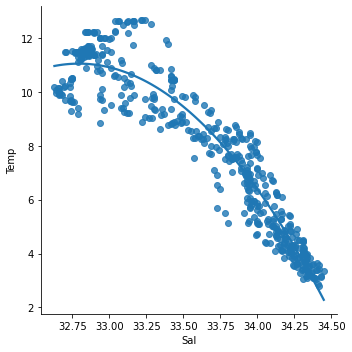

In [42]:
sns.lmplot(x="Sal", y="Temp", data=df_binary500, order = 2, ci=None)

We can already see that the first 500 rows follow a linear model. Continuing with the same steps as before

In [43]:
df_binary500.fillna(method="ffill", inplace=True)

X = np.array(df_binary500['Sal']).reshape(-1,1)
y = np.array(df_binary500['Temp']).reshape(-1,1)
df_binary.dropna(inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

C:\Users\KIIT01\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [44]:
regr = LinearRegression()
regr.fit(X_train,y_train)
print(regr.score(X_test, y_test))

0.8560278661732288


In [45]:
y_pred = regr.predict(X_test)

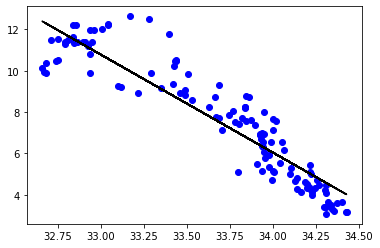

In [46]:
plt.scatter(X_test, y_test, color="b")
plt.plot(X_test, y_pred, color="k")
plt.show()

### Step 8: Evaluation Metrics for Regression

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_true = y_test, y_pred = y_pred)
mse = mean_squared_error(y_true = y_test, y_pred = y_pred) #by defualt squared=True
rmse = mean_squared_error(y_true = y_test, y_pred = y_pred, squared=False)

In [49]:
print("MAE", mae)
print("MSE", mse)
print("RMSE", rmse)

MAE 0.8615723295112784
MSE 1.1658850091963213
RMSE 1.0797615520087394
